In [2]:
import pandas as pd

# Step 1: Load the Dataset
df = pd.read_csv('customer_data.csv')

# Inspect the dataset
print("Shape of the dataset:", df.shape)
print("First few rows of the dataset:")
print(df.head())

# Check for missing values, duplicates, and data types
print("Missing values:\n", df.isnull().sum())
print("Duplicates:", df.duplicated().sum())
print("Data Types:\n", df.dtypes)

# Summary statistics of the numerical columns
print("Summary statistics:\n", df.describe())


Shape of the dataset: (200, 5)
First few rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Duplicates: 0
Data Types:
 CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object
Summary statistics:
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          20

In [4]:
from sklearn.preprocessing import StandardScaler

# Step 2: Data Preprocessing

# Select relevant columns for clustering (Age, Annual Income, Spending Score)
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Handle missing values (if any) by filling with the mean of the respective column
features = features.fillna(features.mean())

# Standardize the data (important for clustering)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

print("Scaled Features:\n", scaled_features[:5])  # Display first 5 rows of scaled features


Scaled Features:
 [[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


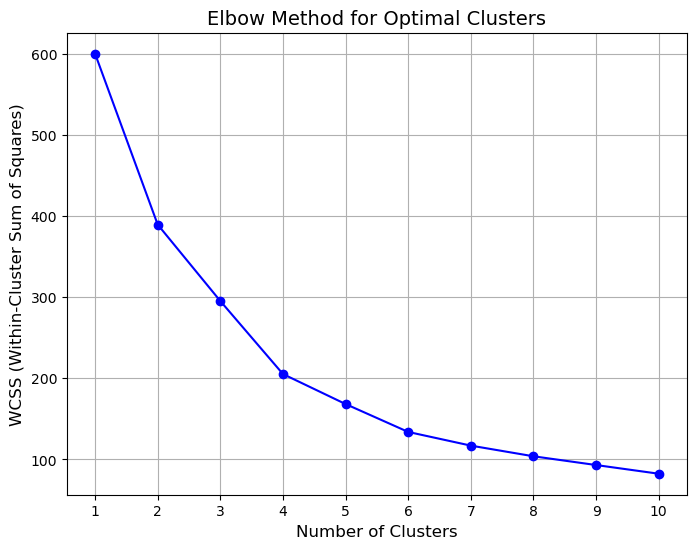

In [22]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Clusters', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


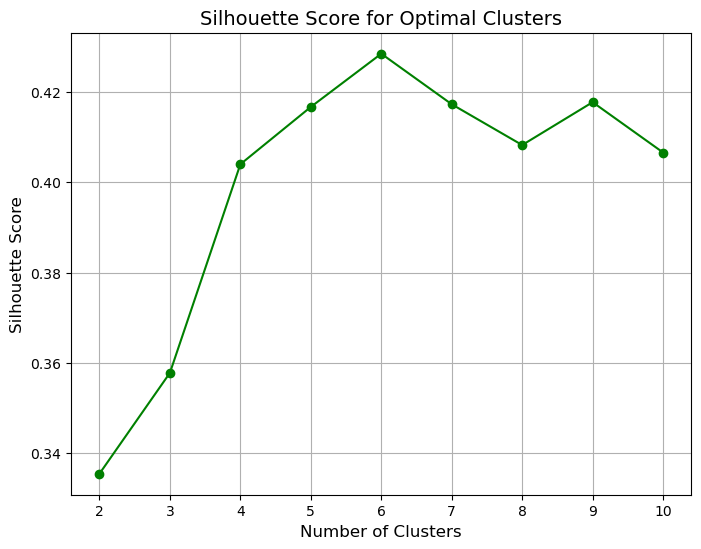

In [24]:
from sklearn.metrics import silhouette_score

# Plot Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='g')
plt.title('Silhouette Score for Optimal Clusters', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True)
plt.show()


In [12]:
# Step 5: Apply K-Means with the optimal number of clusters (e.g., 5 clusters from the elbow plot)
optimal_clusters = 5  # Replace this with the optimal number from your elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)

# Assign cluster labels to each customer
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Inspect the dataset with the assigned clusters
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        1  
1        1  
2        0  
3        1  
4        1  


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


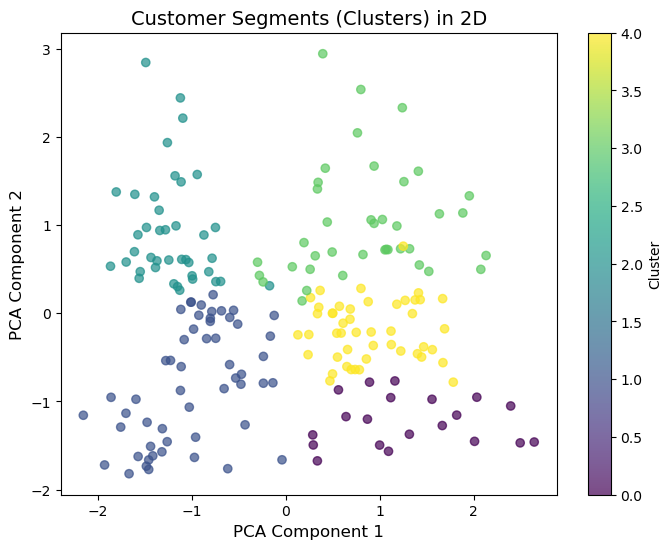

In [14]:
from sklearn.decomposition import PCA

# Step 6: 2D Scatter Plot using PCA to reduce dimensions to 2D for visualization

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.title('Customer Segments (Clusters) in 2D', fontsize=14)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.colorbar(label='Cluster')
plt.show()


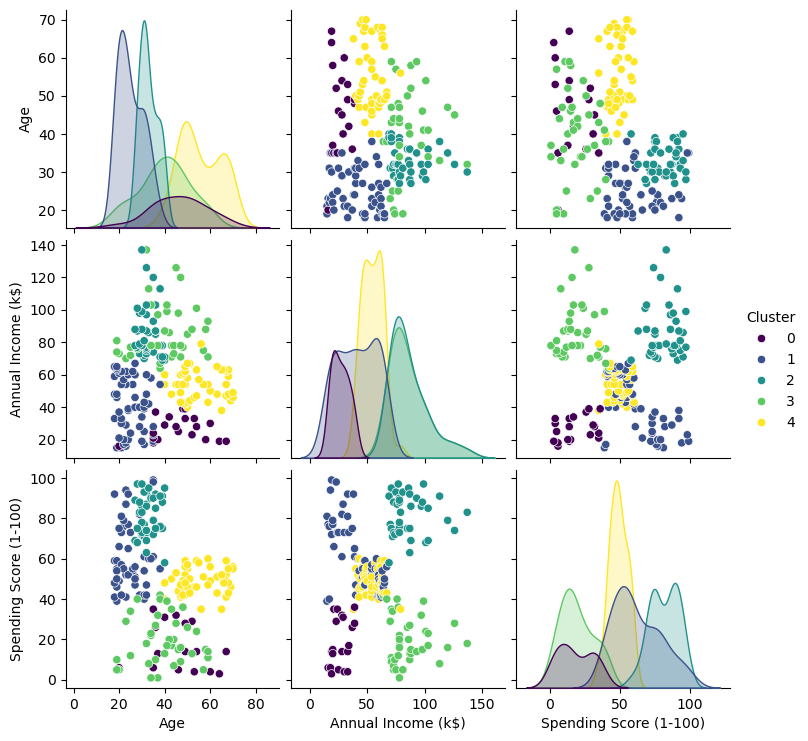

In [16]:
import seaborn as sns

# Step 7: Pair Plot to visualize relationships between features within clusters
sns.pairplot(df, hue='Cluster', vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], palette='viridis')
plt.show()


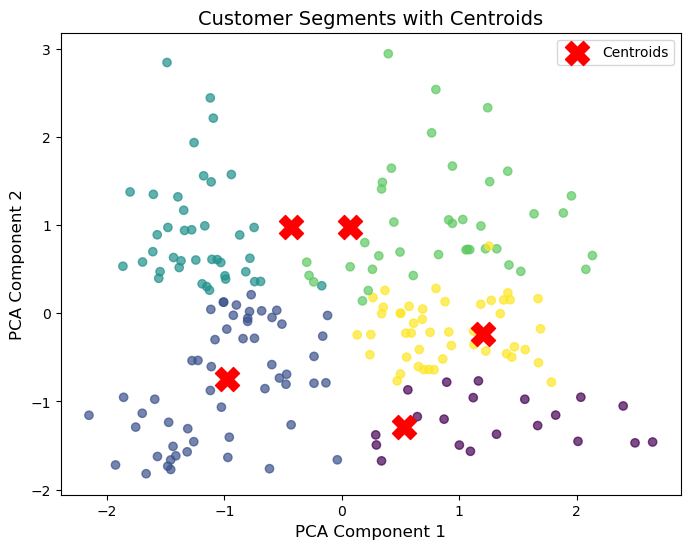

In [17]:
# Step 8: Visualizing the Centroids of Clusters
centroids = kmeans.cluster_centers_

# Plot the centroids on the 2D PCA plot
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('Customer Segments with Centroids', fontsize=14)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.legend()
plt.show()


In [20]:
# Step 9: Save the clustered dataset with the new Cluster column
df.to_csv('customer_data_with_clusters.csv', index=False)

# Inspect the saved file
print("Clustered dataset saved as 'customer_data_with_clusters.csv'.")


Clustered dataset saved as 'customer_data_with_clusters.csv'.
